In [1]:
import pandas as pd

df = pd.read_csv('../outputs/EVAL_11_07.csv')

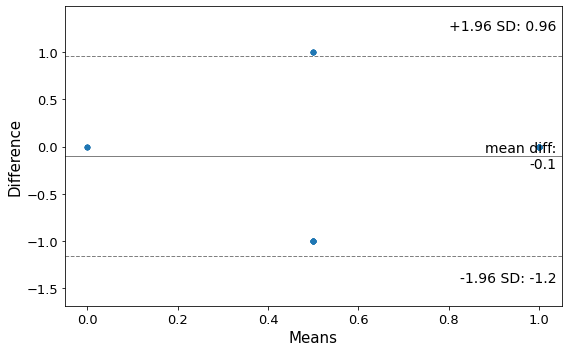

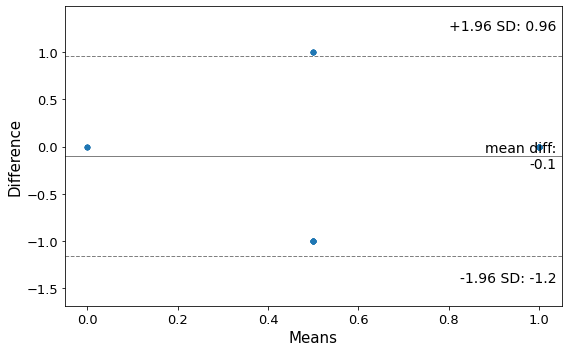

In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Bland-Altman plot                  
f, ax = plt.subplots(1, figsize = (8,5))
# f=plt.figure(facecolor='white')
sm.graphics.mean_diff_plot(df.CNN, df.GASPAR, ax = ax)
# sm.graphics.mean_diff_plot(df.CNN, df.GERMAN, ax = ax)
# sm.graphics.mean_diff_plot(df.CNN, df.ROGELIO, ax = ax)
# sm.graphics.mean_diff_plot(df.CNN, df.GABRIEL, ax = ax)
# plt.savefig('test.png')

# #create Bland-Altman plot                  
# f, ax = plt.subplots(1, figsize = (8,5))
# # f=plt.figure(facecolor='white')
# sm.graphics.mean_diff_plot(df.CNN, df.GERMAN, ax = ax)
# plt.savefig('test.png')

# #create Bland-Altman plot                  
# f, ax = plt.subplots(1, figsize = (8,5))
# # f=plt.figure(facecolor='white')
# sm.graphics.mean_diff_plot(df.CNN, df.ROGELIO, ax = ax)
# # plt.savefig('test.png')

# #create Bland-Altman plot                  
# f, ax = plt.subplots(1, figsize = (8,5))
# # f=plt.figure(facecolor='white')
# sm.graphics.mean_diff_plot(df.CNN, df.GABRIEL, ax = ax)
# plt.savefig('test.png')

### McNemar test

|                 | Test 2 positive | Test 2 negative | Row total      |
|-----------------|-----------------|-----------------|----------------|
| Test 1 positive | a      | b      | a + b |
| Test 1 negative | c      | d      | c + d |
| Column total    | a + c  | b + d  | N    |

Given $T_1$ and $T_2$ tests in a contingency table, the null hypothesis of marginal homogeneity states that the two marginal probabilities for each outcome are the same, i.e. $pa + pb = pa + pc$ and $pc + pd = pb + pd$.

Thus:

$H_0$: $p_b = p_c$

$H_1$: $p_b \neq p_c$

p-value  $< 0.05$ $\implies$ $H_1$ rejected

In [3]:
# from statsmodels.stats.contingency_tables import mcnemar
from mlxtend.evaluate import mcnemar_table, mcnemar
import numpy as np

y_true = df['CNN'].to_numpy()

y_mod1 = df['GASPAR'].to_numpy()
y_mod2 = df['ROGELIO'].to_numpy()

tb = mcnemar_table(y_target=y_true, 
                   y_model1=y_mod1, 
                   y_model2=y_mod2)
print('Gaspar vs German')
print(tb)
stat, p = mcnemar(tb)
print('McNemar: ', stat)
print('p-value: ',p)

y_mod1 = df['GASPAR'].to_numpy()
y_mod2 = df['GABRIEL'].to_numpy()

tb = mcnemar_table(y_target=y_true, 
                   y_model1=y_mod1, 
                   y_model2=y_mod2)
print('Gaspar vs Gabriel')
print(tb)
stat, p = mcnemar(tb)
print('McNemar: ', stat)
print('p-value: ',p)

y_mod1 = df['ROGELIO'].to_numpy()
y_mod2 = df['GABRIEL'].to_numpy()

tb = mcnemar_table(y_target=y_true, 
                   y_model1=y_mod1, 
                   y_model2=y_mod2)
print('Gaspar vs Rogelio')
print(tb)
stat, p = mcnemar(tb)
print('McNemar: ', stat)
print('p-value: ',p)

y_mod1 = df['GERMAN'].to_numpy()
y_mod2 = df['ROGELIO'].to_numpy()

tb = mcnemar_table(y_target=y_true, 
                   y_model1=y_mod1, 
                   y_model2=y_mod2)
print('German vs Rogelio')
print(tb)
stat, p = mcnemar(tb)
print('McNemar: ', stat)
print('p-value: ',p)

y_mod1 = df['GERMAN'].to_numpy()
y_mod2 = df['GABRIEL'].to_numpy()

tb = mcnemar_table(y_target=y_true, 
                   y_model1=y_mod1, 
                   y_model2=y_mod2)
print('German vs Gabriel:')
print(tb)
stat, p = mcnemar(tb)
print('McNemar: ', stat)
print('p-value: ',p)

Gaspar vs German
[[57 13]
 [ 5 25]]
McNemar:  2.7222222222222223
p-value:  0.09896015401940522
Gaspar vs Gabriel
[[50 20]
 [ 8 22]]
McNemar:  4.321428571428571
p-value:  0.03763531378731436
Gaspar vs Rogelio
[[40 22]
 [18 20]]
McNemar:  0.225
p-value:  0.6352562959972483
German vs Rogelio
[[44 18]
 [18 20]]
McNemar:  0.027777777777777776
p-value:  0.8676323347781927
German vs Gabriel:
[[39 23]
 [19 19]]
McNemar:  0.21428571428571427
p-value:  0.6434288435636206
